In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data_dir = './hyperopt'

In [34]:
def load_rewards(dir_name, run='0'):
    results_dir = os.path.join(data_dir, dir_name)
    data = []
    for result_dir in os.listdir(results_dir):
        file = os.path.join(results_dir, result_dir, run, 'rewards.csv')
        data.append((result_dir, pd.read_csv(file)))
    return data

def plot_rewards(data):
    plt.figure()
    for name, df in data:
        plt.plot(df[['train']], label=name)
    plt.legend()
    plt.title('train')
    plt.show()

    plt.figure()
    for name, df in data:
        plt.plot(df[['evaluation']], label=name)
    plt.legend()
    plt.title('evaluation')
    plt.show()  

# Learning rates

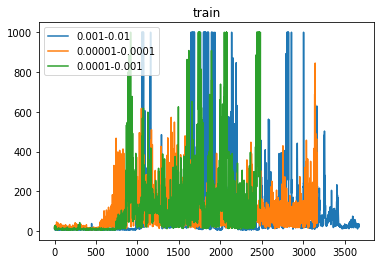

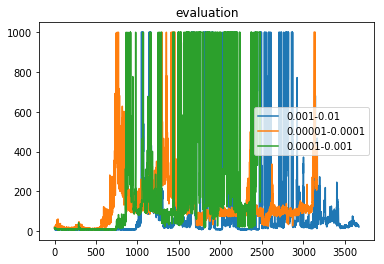

In [35]:
dir_name = 'learningrates'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

# Gammas

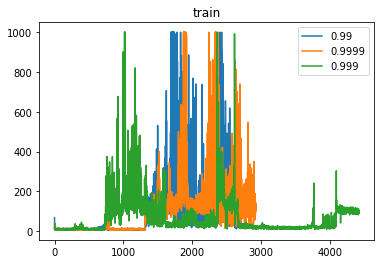

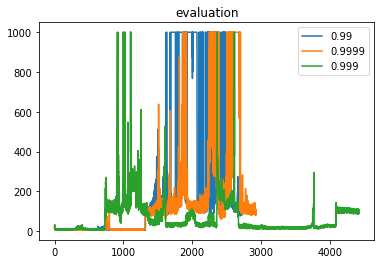

In [36]:
dir_name = 'gammas'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

# Taus

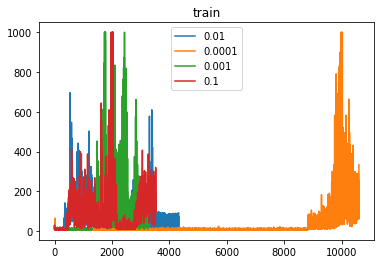

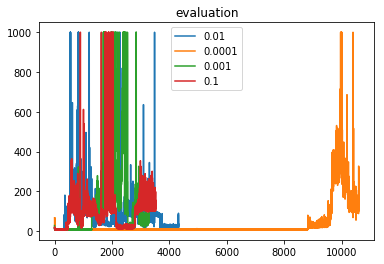

In [37]:
dir_name = 'taus'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

# Memory Size

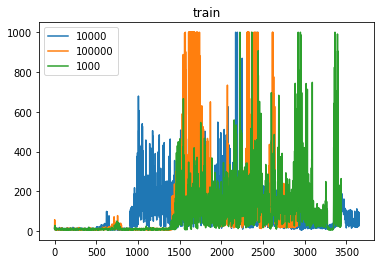

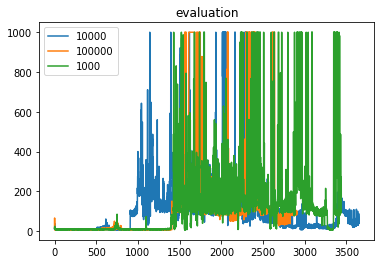

In [39]:
dir_name = 'replay_sizes'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)